<a href="https://colab.research.google.com/github/GopikaPavithran/Prodigy-Internship/blob/main/Prodigy_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Prices - Advanced Regression Techniques**

### **Importing Required Libraries**

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings

# **Dataset Loading**

In [170]:
df_train=pd.read_csv('/content/drive/MyDrive/Prodigy Internship Data/Task 1 - House Price/train.csv')
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [171]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [172]:
df_test=pd.read_csv('/content/drive/MyDrive/Prodigy Internship Data/Task 1 - House Price/test.csv')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [173]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [174]:
df_y_test=pd.read_csv('/content/drive/MyDrive/Prodigy Internship Data/Task 1 - House Price/sample_submission.csv')
df_y_test

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

In [175]:
df_test=pd.merge(df_test,df_y_test,on='Id')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            HLS    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition      SalePrice  
0         6   2010        WD         Normal  169277.052498  
1         6   2010        WD         Normal  187758.393989  
2         3   2010        WD         Normal  183583.683570  
3         6   2010        WD         Normal  179317.477511  
4         1   2010        WD         Normal  150730.079977  
...     ...    ...       ...            ...            ...  
1454      6   2006        WD         Normal  167081.220949  
1455      4   2006        WD        Abnorml  164788.778231  
1456      9   2006        WD        Abnorml  219222.423400  
1457      7   2006        WD         Normal  184924.279659  
1458     11   2006        WD         Normal  187741.866657  

[1459 rows x 81 columns]

In [176]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2914         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2915         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2916         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2917         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2918         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition      SalePrice  
0         2   2008        WD         Normal  208500.000000  
1         5   2007        WD         Normal  181500.000000  
2         9   2008        WD         Normal  223500.000000  
3         2   2006        WD        Abnorml  140000.000000  
4        12   2008        WD         Normal  250000.000000  
...     ...    ...       ...            ...            ...  
2914      6   2006        WD         Normal  167081.220949  
2915      4   2006        WD        Abnorml  164788.778231  
2916      9   2006        WD        Abnorml  219222.423400  
2917      7   2006        WD         Normal  184924.279659  
2918     11   2006        WD         Normal  187741.866657  

[2919 rows x 81 columns]

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# **Exploratory Data Analysis**

Distribution of numerical variables

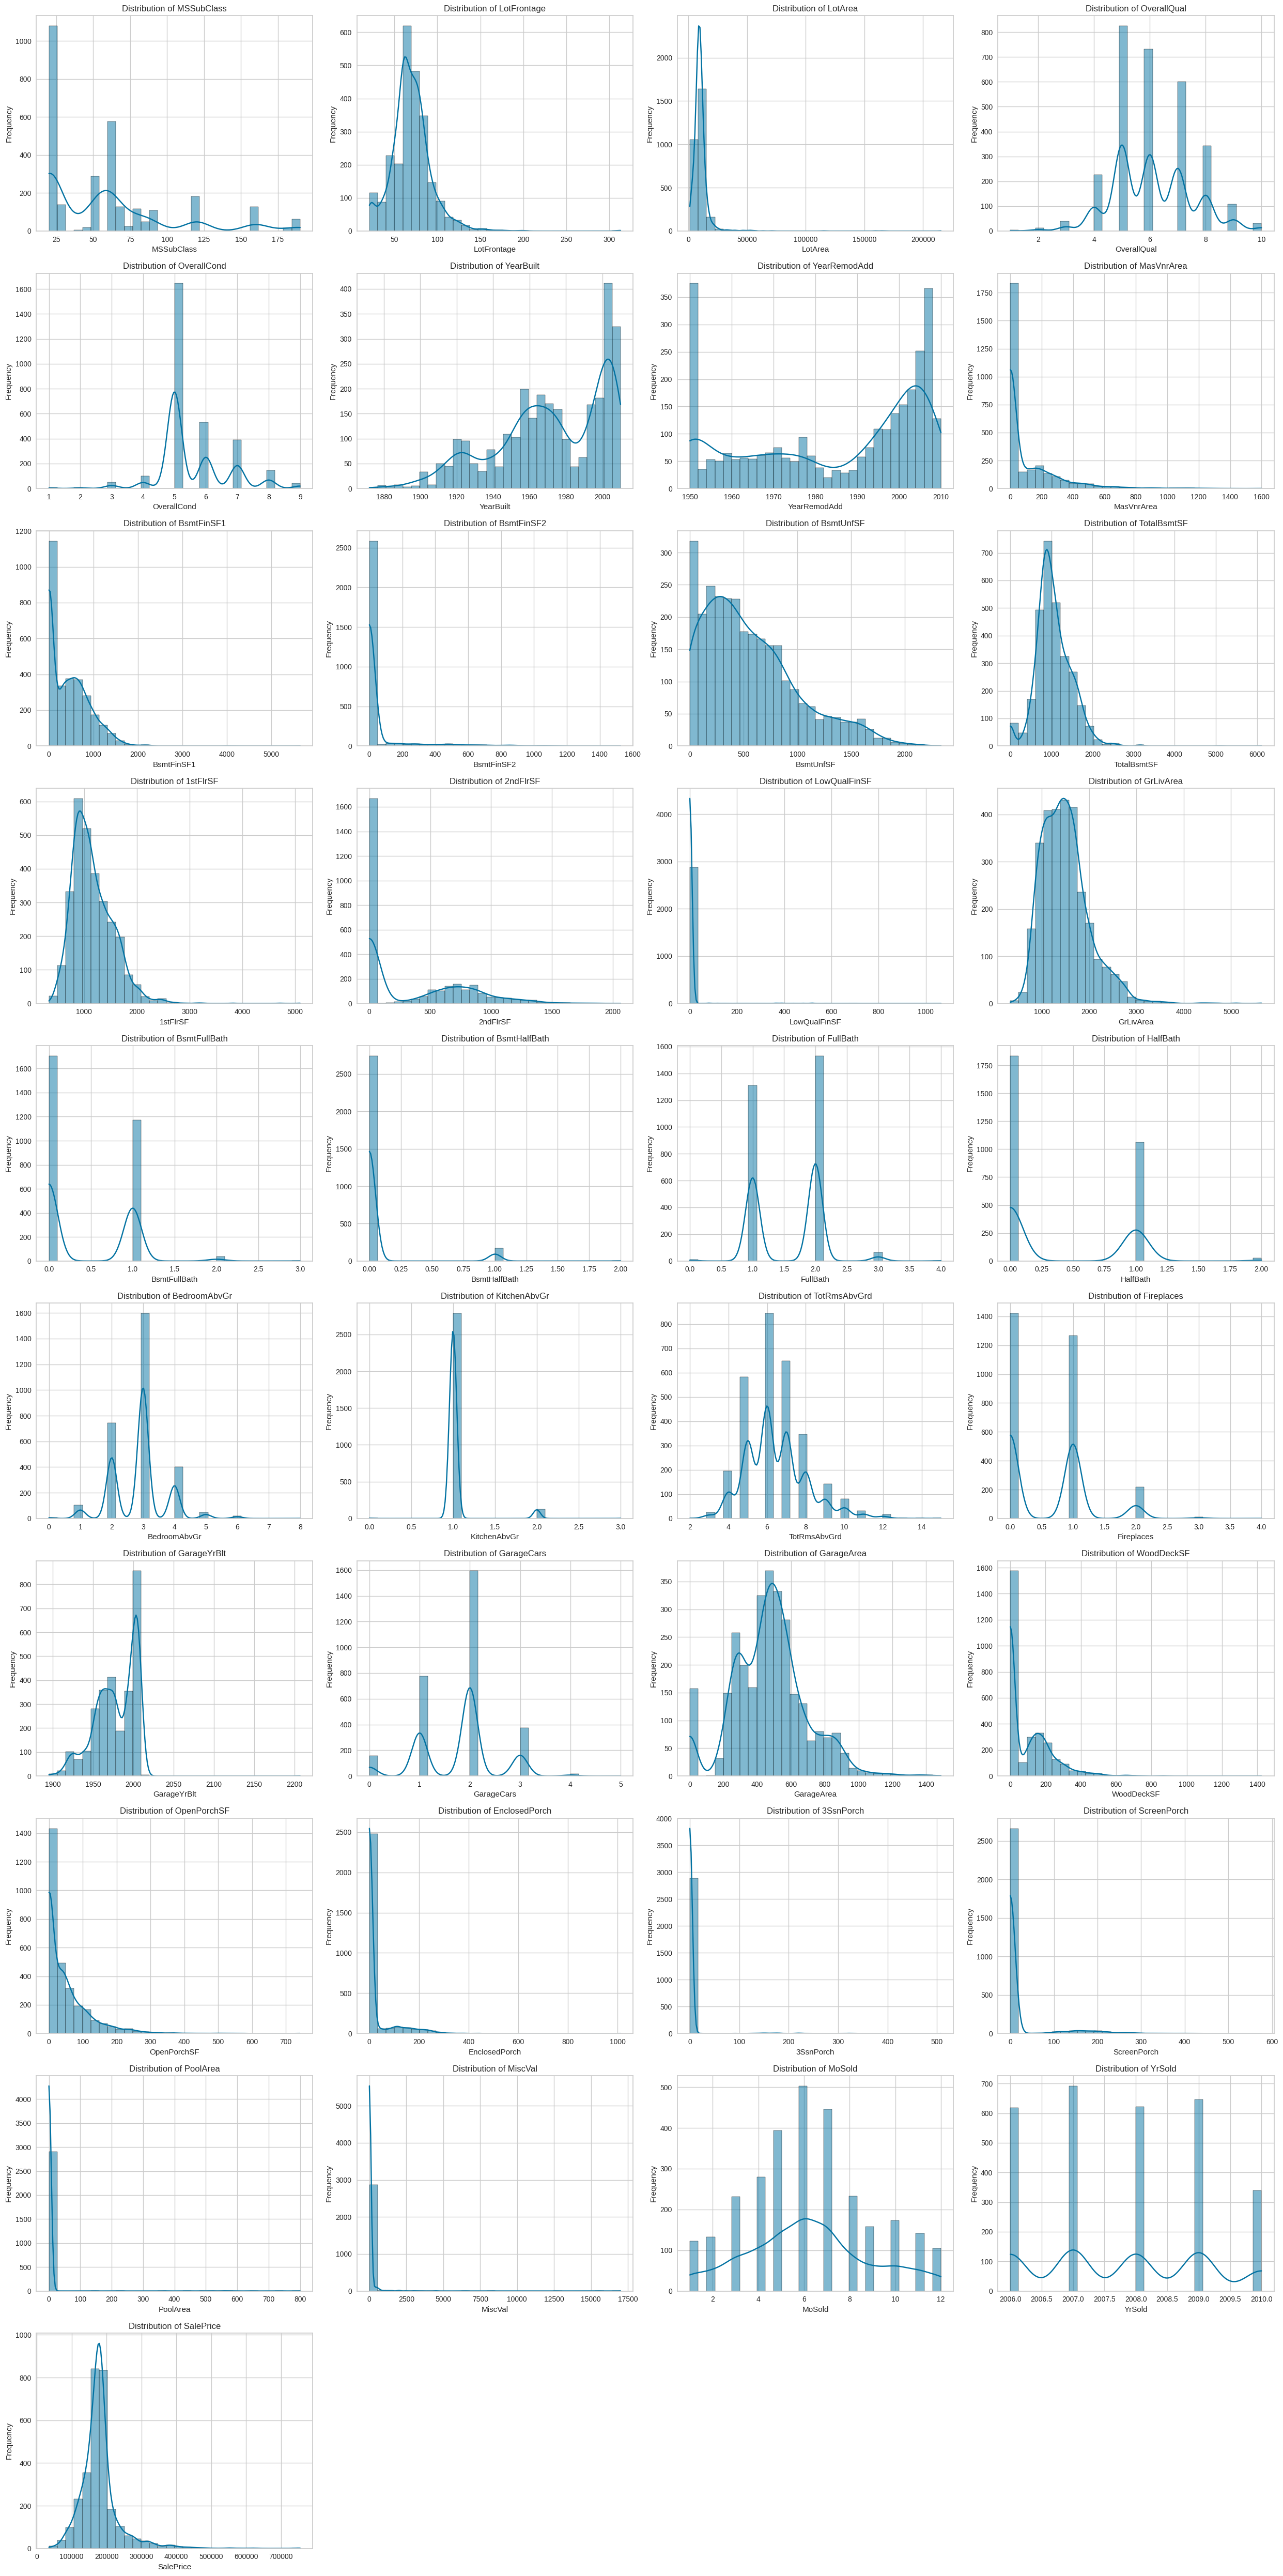

In [178]:
num_col=df.select_dtypes(include=['float','int']).drop('Id',axis=1).columns
fig,axes=plt.subplots(nrows=int(np.ceil(len(num_col)/4)),ncols=4,figsize=(25,50))
axes=axes.flatten()
for i,col in enumerate(num_col):
    sns.histplot(df[col],kde=True,bins=30,ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Categorical Count

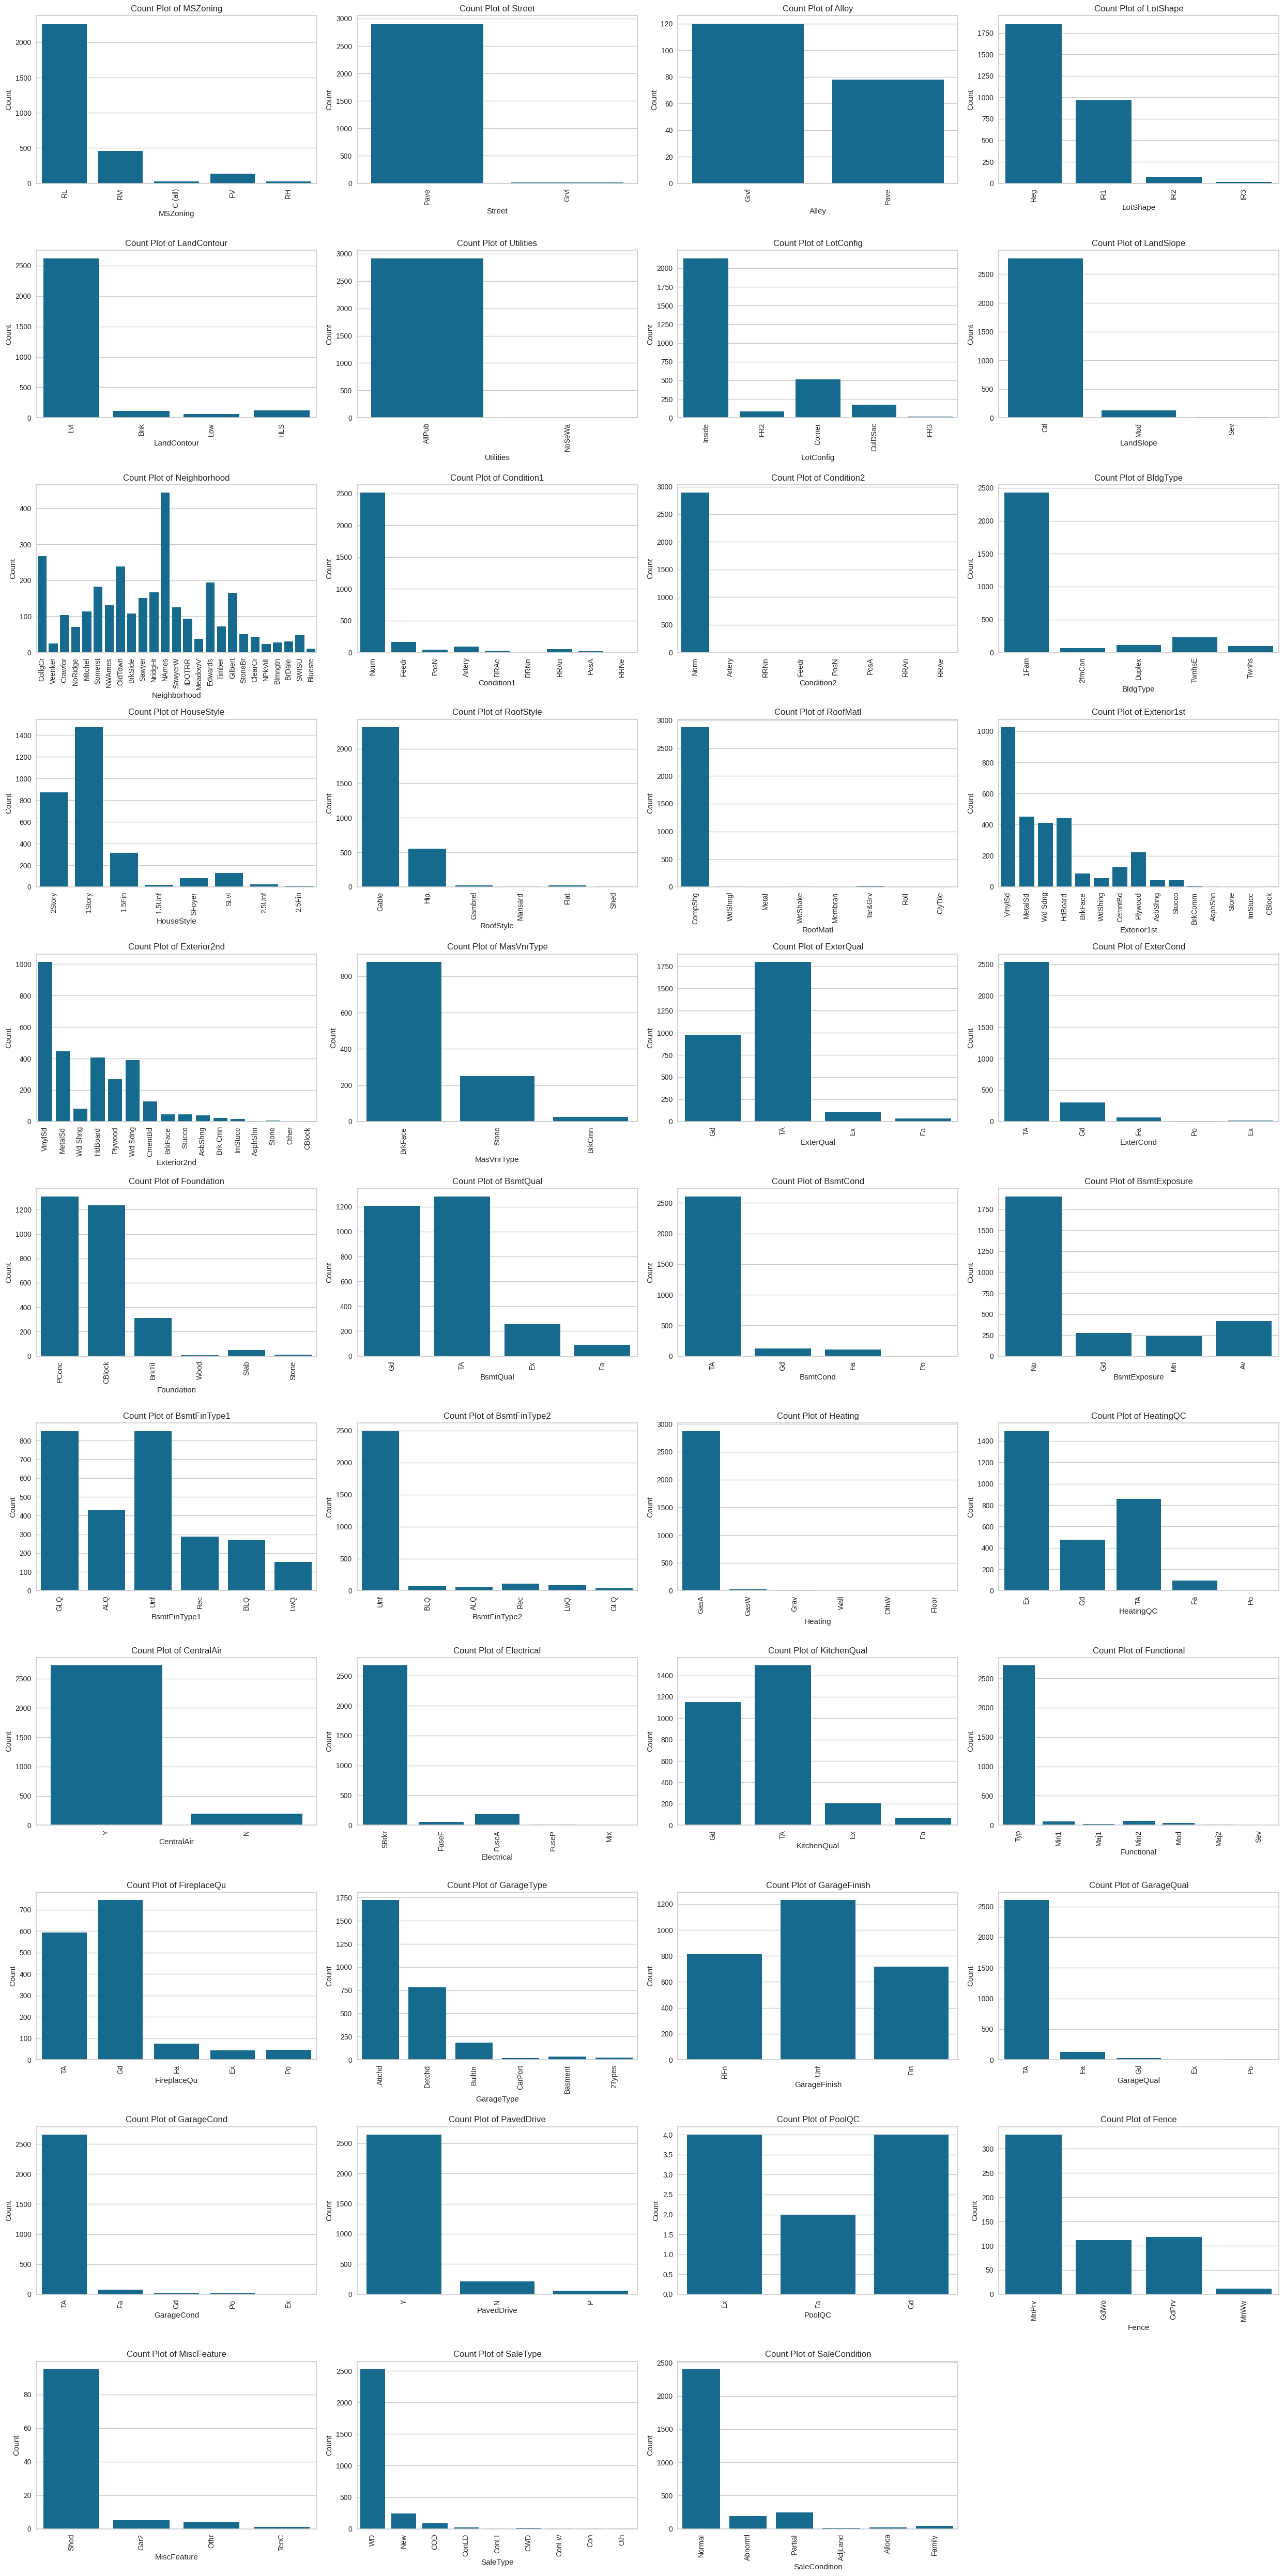

In [179]:
cat_col=df.select_dtypes(include=['object']).columns
num_rows=int(np.ceil(len(cat_col)/4))
fig,axes=plt.subplots(nrows=num_rows,ncols=4,figsize=(25, 50))
axes=axes.flatten()
for i,col in enumerate(cat_col):
    sns.countplot(data=df,x=col,ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x',rotation=90)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Descriptive Statistics of SalePrice

In [180]:
print(df['SalePrice'].describe())

count      2919.000000
mean     180052.854647
std       57381.565721
min       34900.000000
25%      154795.084126
50%      176734.841494
75%      191895.744157
max      755000.000000
Name: SalePrice, dtype: float64


Trends in Average Price Over Time

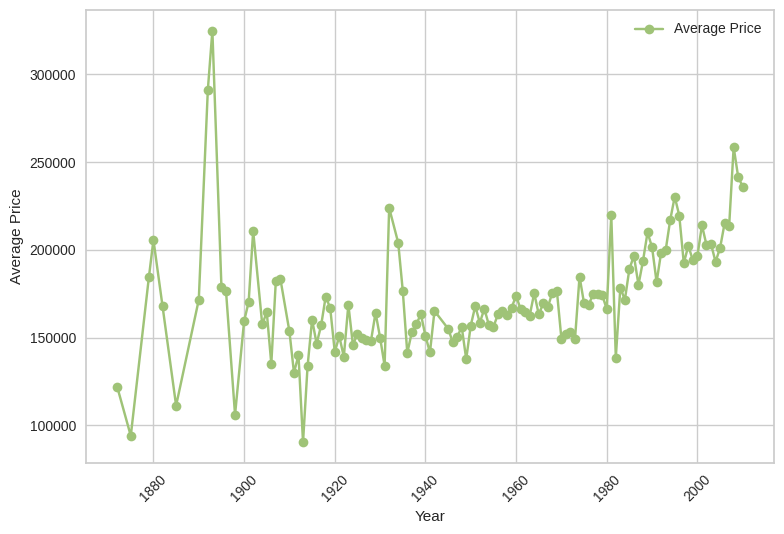

In [181]:
t= df.groupby('YearBuilt')['SalePrice'].mean()
plt.plot(t.index, t.values, marker='o', linestyle='-', color='g', label='Average Price')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis of House Prices Based on Square Footage, Bedrooms, and Bathrooms

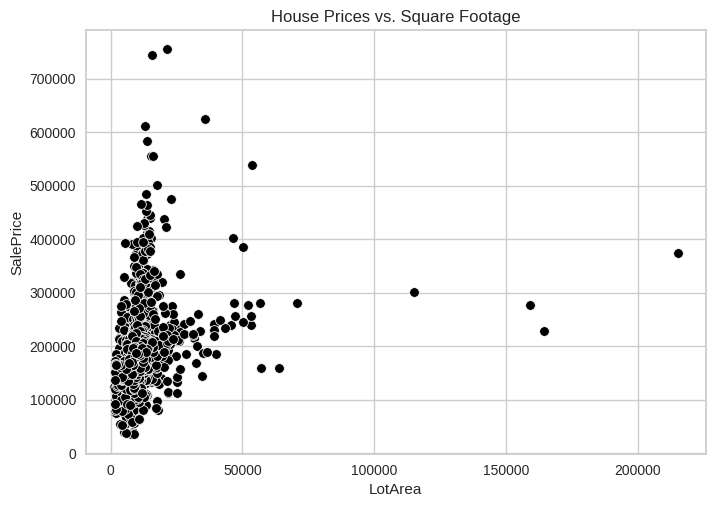

In [182]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df,color='black')
plt.title('House Prices vs. Square Footage')
plt.show()

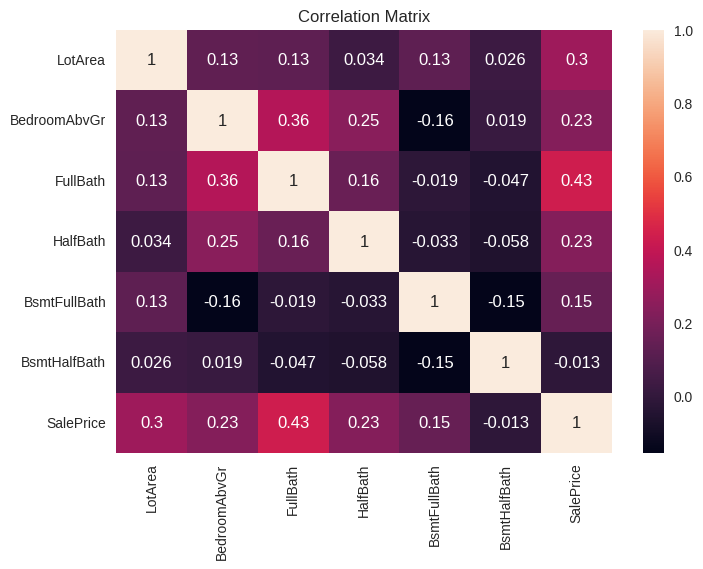

In [183]:
selected_features=df[['LotArea','BedroomAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','SalePrice']]
corr_matrix=selected_features.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

# **Preprocessing**

In [184]:
missing_values=df.isna().sum()
data_types=df.dtypes
output_str="Missing values in each column:\n\n"
for column,count in missing_values.items():
    dtype=data_types[column]
    output_str+=f"{column:20}:{count} {dtype}\n"
print(output_str)

Missing values in each column:

Id                  :0 int64
MSSubClass          :0 int64
MSZoning            :4 object
LotFrontage         :486 float64
LotArea             :0 int64
Street              :0 object
Alley               :2721 object
LotShape            :0 object
LandContour         :0 object
Utilities           :2 object
LotConfig           :0 object
LandSlope           :0 object
Neighborhood        :0 object
Condition1          :0 object
Condition2          :0 object
BldgType            :0 object
HouseStyle          :0 object
OverallQual         :0 int64
OverallCond         :0 int64
YearBuilt           :0 int64
YearRemodAdd        :0 int64
RoofStyle           :0 object
RoofMatl            :0 object
Exterior1st         :1 object
Exterior2nd         :1 object
MasVnrType          :1766 object
MasVnrArea          :23 float64
ExterQual           :0 object
ExterCond           :0 object
Foundation          :0 object
BsmtQual            :81 object
BsmtCond            :82 object
Bs

In [185]:
df=df.drop(['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [186]:
missing_obj_features=['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
for i in missing_obj_features:
  df[i]=df[i].fillna(df[i].mode()[0])

In [187]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [188]:
basement_features=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df[basement_features]=df[basement_features].fillna('No Basement')

In [189]:
bas_num_features=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for i in bas_num_features:
  df[i]=df[i].fillna(df[i].median())

In [190]:
garage_features=['GarageType','GarageFinish','GarageQual','GarageCond']
df[garage_features]=df[garage_features].fillna('No Garage')

In [191]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

In [192]:
gar_num_features=['GarageCars','GarageArea']
for i in gar_num_features:
  df[i]=df[i].fillna(df[i].median())

In [193]:
cat_col=df.select_dtypes(include=['object']).columns
for col in cat_col:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [194]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  51.,  50.,  70.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.,
        26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,  22.,
       123., 195., 155., 126., 200., 131., 133.])

In [195]:
df['LotFrontage']=df['LotFrontage'].astype(int)

In [196]:
df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [197]:
df['MasVnrArea']=df['MasVnrArea'].astype(int)

In [198]:
df[df.select_dtypes(include=['float']).columns]=df.select_dtypes(include=['float']).astype(int)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     2919 non-null   int64
 1   MSZoning       2919 non-null   int64
 2   LotFrontage    2919 non-null   int64
 3   LotArea        2919 non-null   int64
 4   Street         2919 non-null   int64
 5   LotShape       2919 non-null   int64
 6   LandContour    2919 non-null   int64
 7   Utilities      2919 non-null   int64
 8   LotConfig      2919 non-null   int64
 9   LandSlope      2919 non-null   int64
 10  Neighborhood   2919 non-null   int64
 11  Condition1     2919 non-null   int64
 12  Condition2     2919 non-null   int64
 13  BldgType       2919 non-null   int64
 14  HouseStyle     2919 non-null   int64
 15  OverallQual    2919 non-null   int64
 16  OverallCond    2919 non-null   int64
 17  YearBuilt      2919 non-null   int64
 18  YearRemodAdd   2919 non-null   int64
 19  RoofSt

In [203]:
X=df.drop('SalePrice',axis=1)
X

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3           65     8450       1         3   
1             20         3           80     9600       1         3   
2             60         3           68    11250       1         0   
3             70         3           60     9550       1         0   
4             60         3           84    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
2914         160         4           21     1936       1         3   
2915         160         4           21     1894       1         3   
2916          20         3          160    20000       1         3   
2917          85         3           62    10441       1         3   
2918          60         3           74     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0               3          0          4          0  ...           61   
1               3          0          2          0  ...            0   
2               3          0          4          0  ...           42   
3               3          0          0          0  ...           35   
4               3          0          2          0  ...           84   
...           ...        ...        ...        ...  ...          ...   
2914            3          0          4          0  ...            0   
2915            3          0          4          0  ...           24   
2916            3          0          4          0  ...            0   
2917            3          0          4          0  ...           32   
2918            3          0          4          1  ...           48   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0        0       2   
4                 0          0            0         0        0      12   
...             ...        ...          ...       ...      ...     ...   
2914              0          0            0         0        0       6   
2915              0          0            0         0        0       4   
2916              0          0            0         0        0       9   
2917              0          0            0         0      700       7   
2918              0          0            0         0        0      11   

      YrSold  SaleType  SaleCondition  
0       2008         8              4  
1       2007         8              4  
2       2008         8              4  
3       2006         8              0  
4       2008         8              4  
...      ...       ...            ...  
2914    2006         8              4  
2915    2006         8              0  
2916    2006         8              0  
2917    2006         8              4  
2918    2006         8              4  

[2919 rows x 73 columns]

In [204]:
y=df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
2914    167081
2915    164788
2916    219222
2917    184924
2918    187741
Name: SalePrice, Length: 2919, dtype: int64

In [206]:
mms=MinMaxScaler()
X=mms.fit_transform(X)
X

array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.75      , 0.4760274 , ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.75      , 0.14041096, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.18150685, ..., 0.        , 1.        ,
        0.8       ]])

In [209]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [210]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2043, 73), (876, 73), (2043,), (876,))

# **Model Evaluation**

In [211]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [212]:
y_pred=lr.predict(X_test)
y_pred

array([238507.2652989 , 162572.66676598, 223277.66676598, 148283.27263427,
       245947.2652989 , 178165.66676598, 125382.66676598, 175344.66676598,
       160911.66676598, 175453.66676598, 234049.66676598, 141166.66676598,
       228589.66676598, 137791.66676598, 227519.66676598, 181827.66676598,
       305649.66676598,  88371.66676598, 202777.66676598, 125927.66676598,
       217993.66676598, 164432.66676598, 121270.16676598, 117831.16676598,
       186931.2652989 , 156709.27263427, 247723.66676598, 202277.27263427,
       202657.66676598, 182685.66676598, 203974.66676598, 156529.66676598,
       253745.66676598, 188413.66676598, 135981.66676598, 143021.66676598,
       124459.66676598, 150329.66676598, 237839.2652989 , 178193.66676598,
       275907.66676598, 156531.66676598, 135053.66676598, 197025.66676598,
       155207.66676598, 195087.2652989 , 166669.66676598, 209411.2652989 ,
       125037.27263427, 158273.27263427, 151411.27263427, 180485.66676598,
       258349.66676598, 2

In [213]:
y_test.values

array([440000, 168690, 177199, 149900, 423000, 157900, 151713, 155000,
       118500, 170000, 350000, 167523, 374000,  99500, 196559, 136900,
       281643, 173439, 196858, 140196, 319900, 184733, 164228, 153219,
       204900, 142000, 250000, 145000, 161748, 176000, 180000, 135000,
       194650, 213500, 158617, 123000, 160620, 161665, 269500, 159000,
       195556, 182105, 166274, 204264, 134000, 176485, 191930, 248900,
       159434, 182347, 107000, 207500, 208232, 350000, 180106, 175942,
       178534, 167839, 137000, 175846, 260000, 132000, 167484, 260400,
       124000, 219210, 148500, 108959, 182084, 194260, 157580, 183810,
       193981, 167565, 165000, 151500, 171774, 254000, 176000, 182000,
       166548, 180638, 170934, 260000, 176515, 199929, 151217, 178891,
       164115, 170000, 150011,  83000, 162900, 151579, 195531, 310000,
       158151, 181922, 148000, 100000, 199158, 169762, 179460, 178000,
       174000, 183259,  79500, 131000, 207500, 239900, 106000, 122500,
      

In [349]:
result=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
result.reset_index(drop=True,inplace=True)
result

Actual value  Predicted value
0       247545.75    220764.340833
1       168690.00    151771.824866
2       177199.00    199007.197265
3       149900.00    160920.298238
4       247545.75    227599.997800
..            ...              ...
871      99143.75    142248.643013
872     196053.00    174816.986552
873     172400.00    180534.428727
874     198678.00    200550.854383
875     207500.00    191861.404395

[876 rows x 2 columns]

In [215]:
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score :',r2_score(y_test,y_pred))

MAE : 29783.83176532838
MSE : 1688259883.4924564
RSE : 41088.43977924273
r2_score : 0.491875478649456


# **Enhancing Model Performance**

Checking Outliers

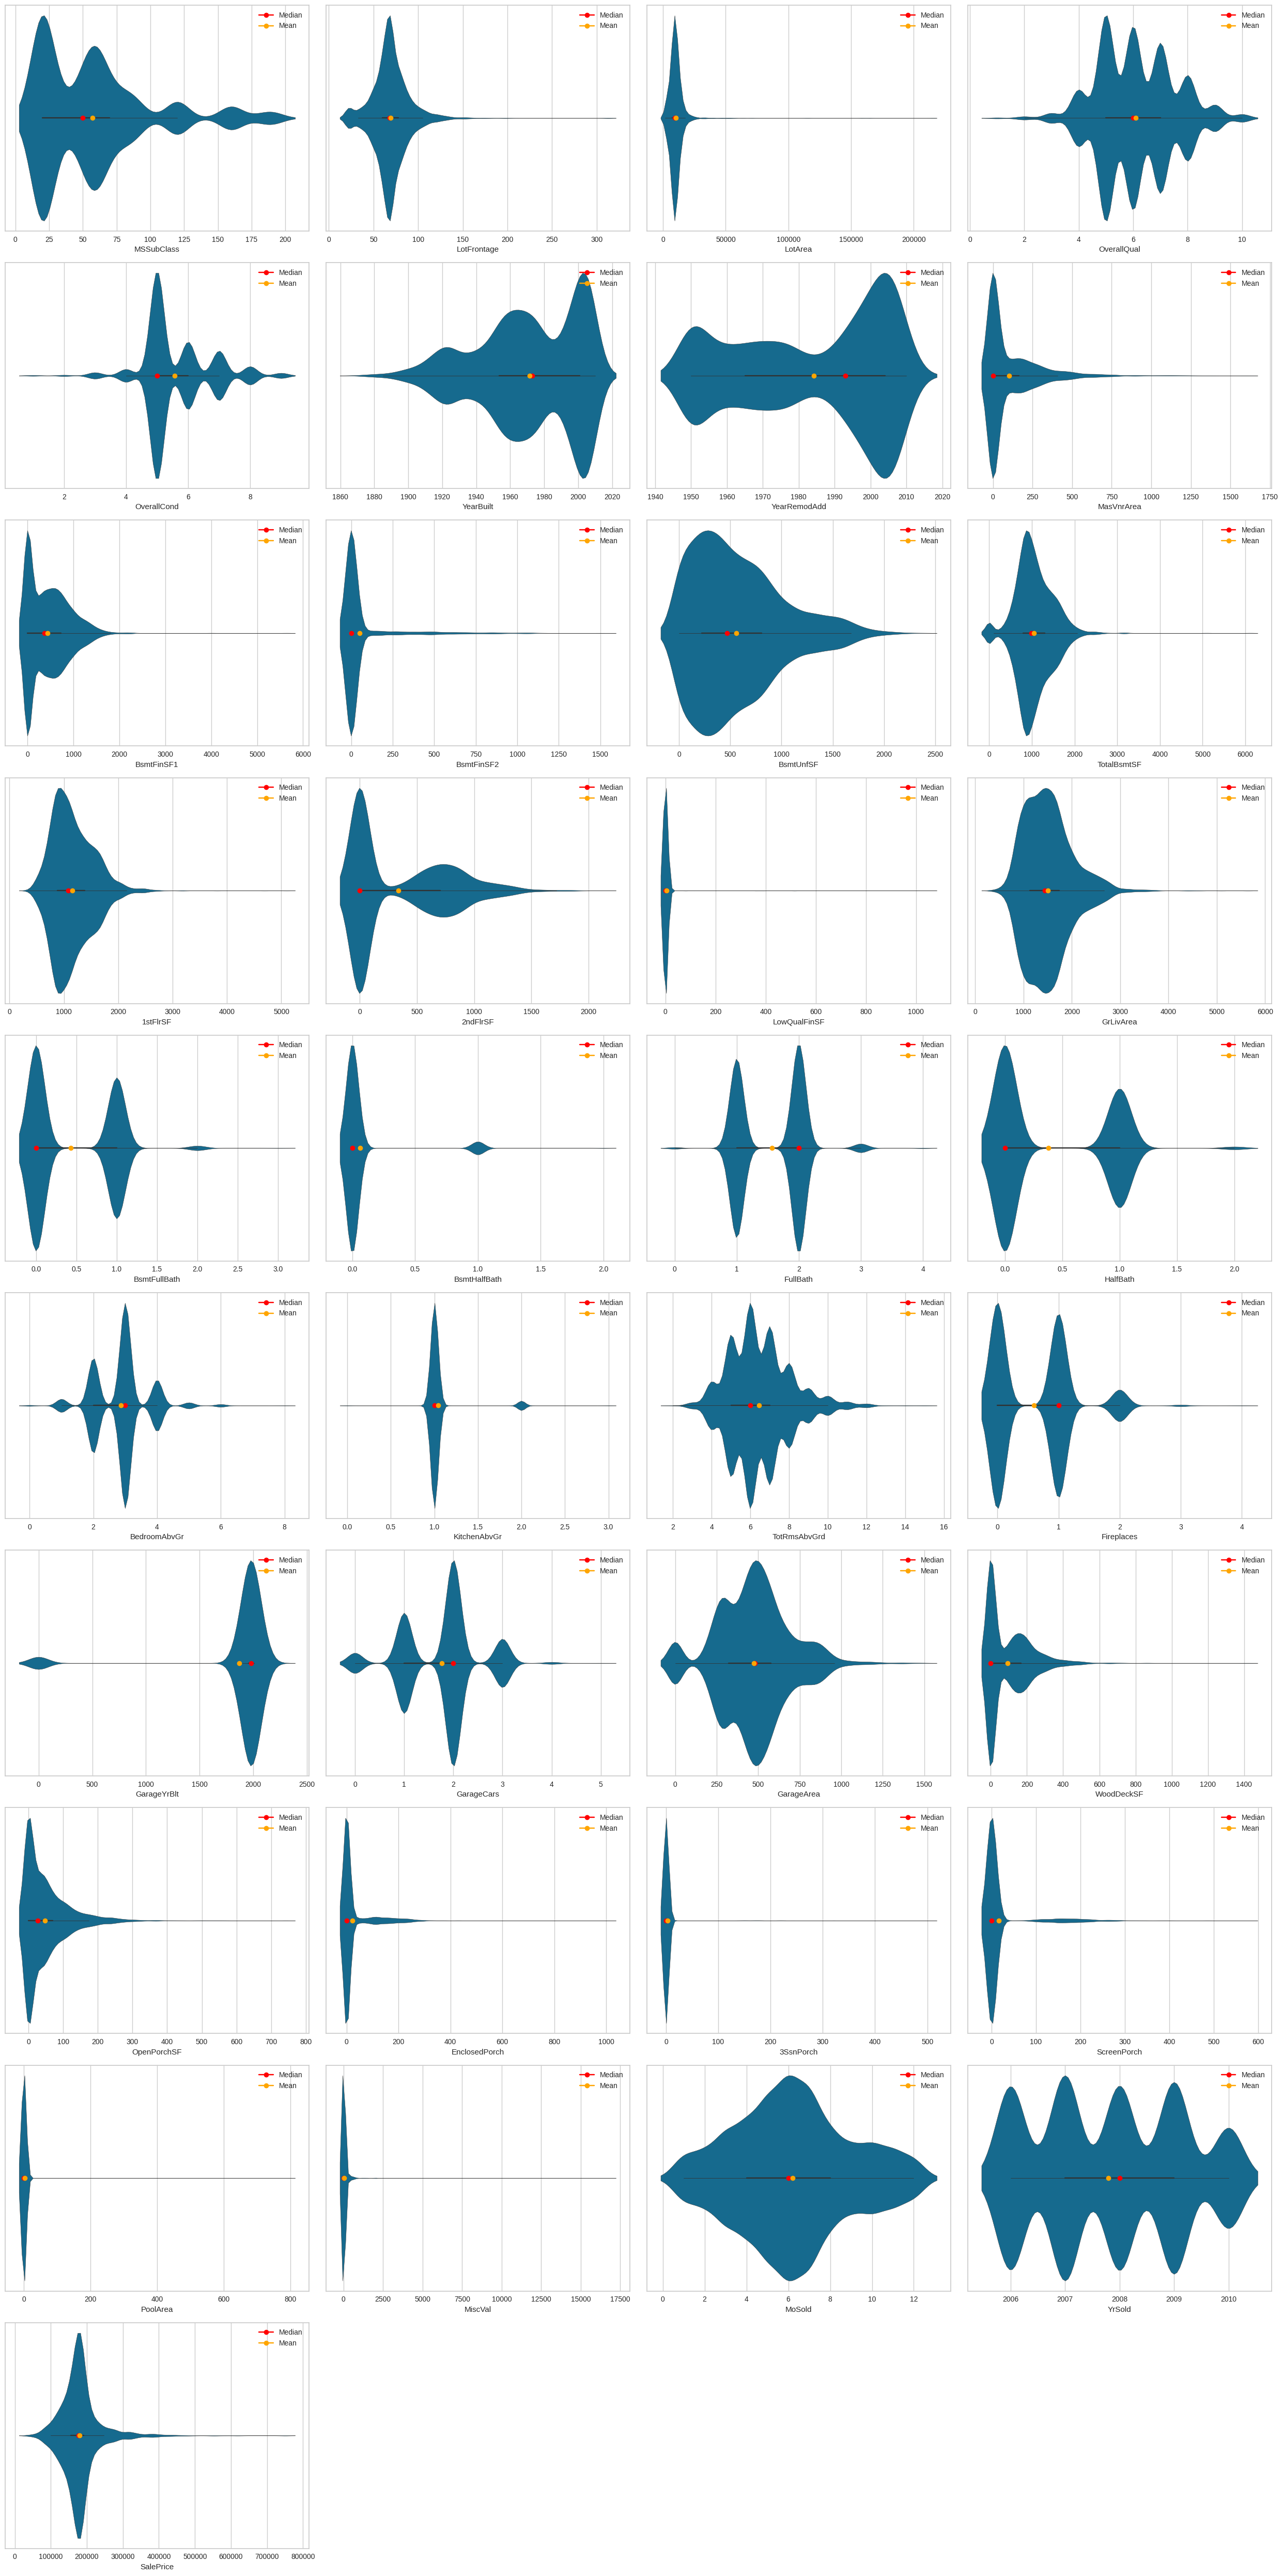

In [220]:
fig,axes = plt.subplots(nrows=int(np.ceil(len(num_col)/4)),ncols=4,figsize=(25, 50))
axes = axes.flatten()
for i,col in enumerate(num_col):
  sns.violinplot(x=df[col], ax=axes[i])
  median=df[col].median()
  mean=df[col].mean()
  axes[i].plot(median,0,marker='o',color='red',label='Median')
  axes[i].plot(mean,0,marker='o',color='orange',label='Mean')
  axes[i].legend()
  warnings.simplefilter(action='ignore',category=FutureWarning)
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Capping

In [221]:
def cap_outliers(df,columns):
  df_cap=df.copy()
  for col in columns:
    q1=df_cap[col].quantile(0.25)
    q3=df_cap[col].quantile(0.75)
    iqr=q3 - q1
    lower_cap=q1-1.5*iqr
    upper_cap=q3+1.5*iqr
    df_cap[col]=df_cap[col].clip(lower=lower_cap, upper=upper_cap)
  return df_cap

In [224]:
df_cap=cap_outliers(df.copy(),num_col)

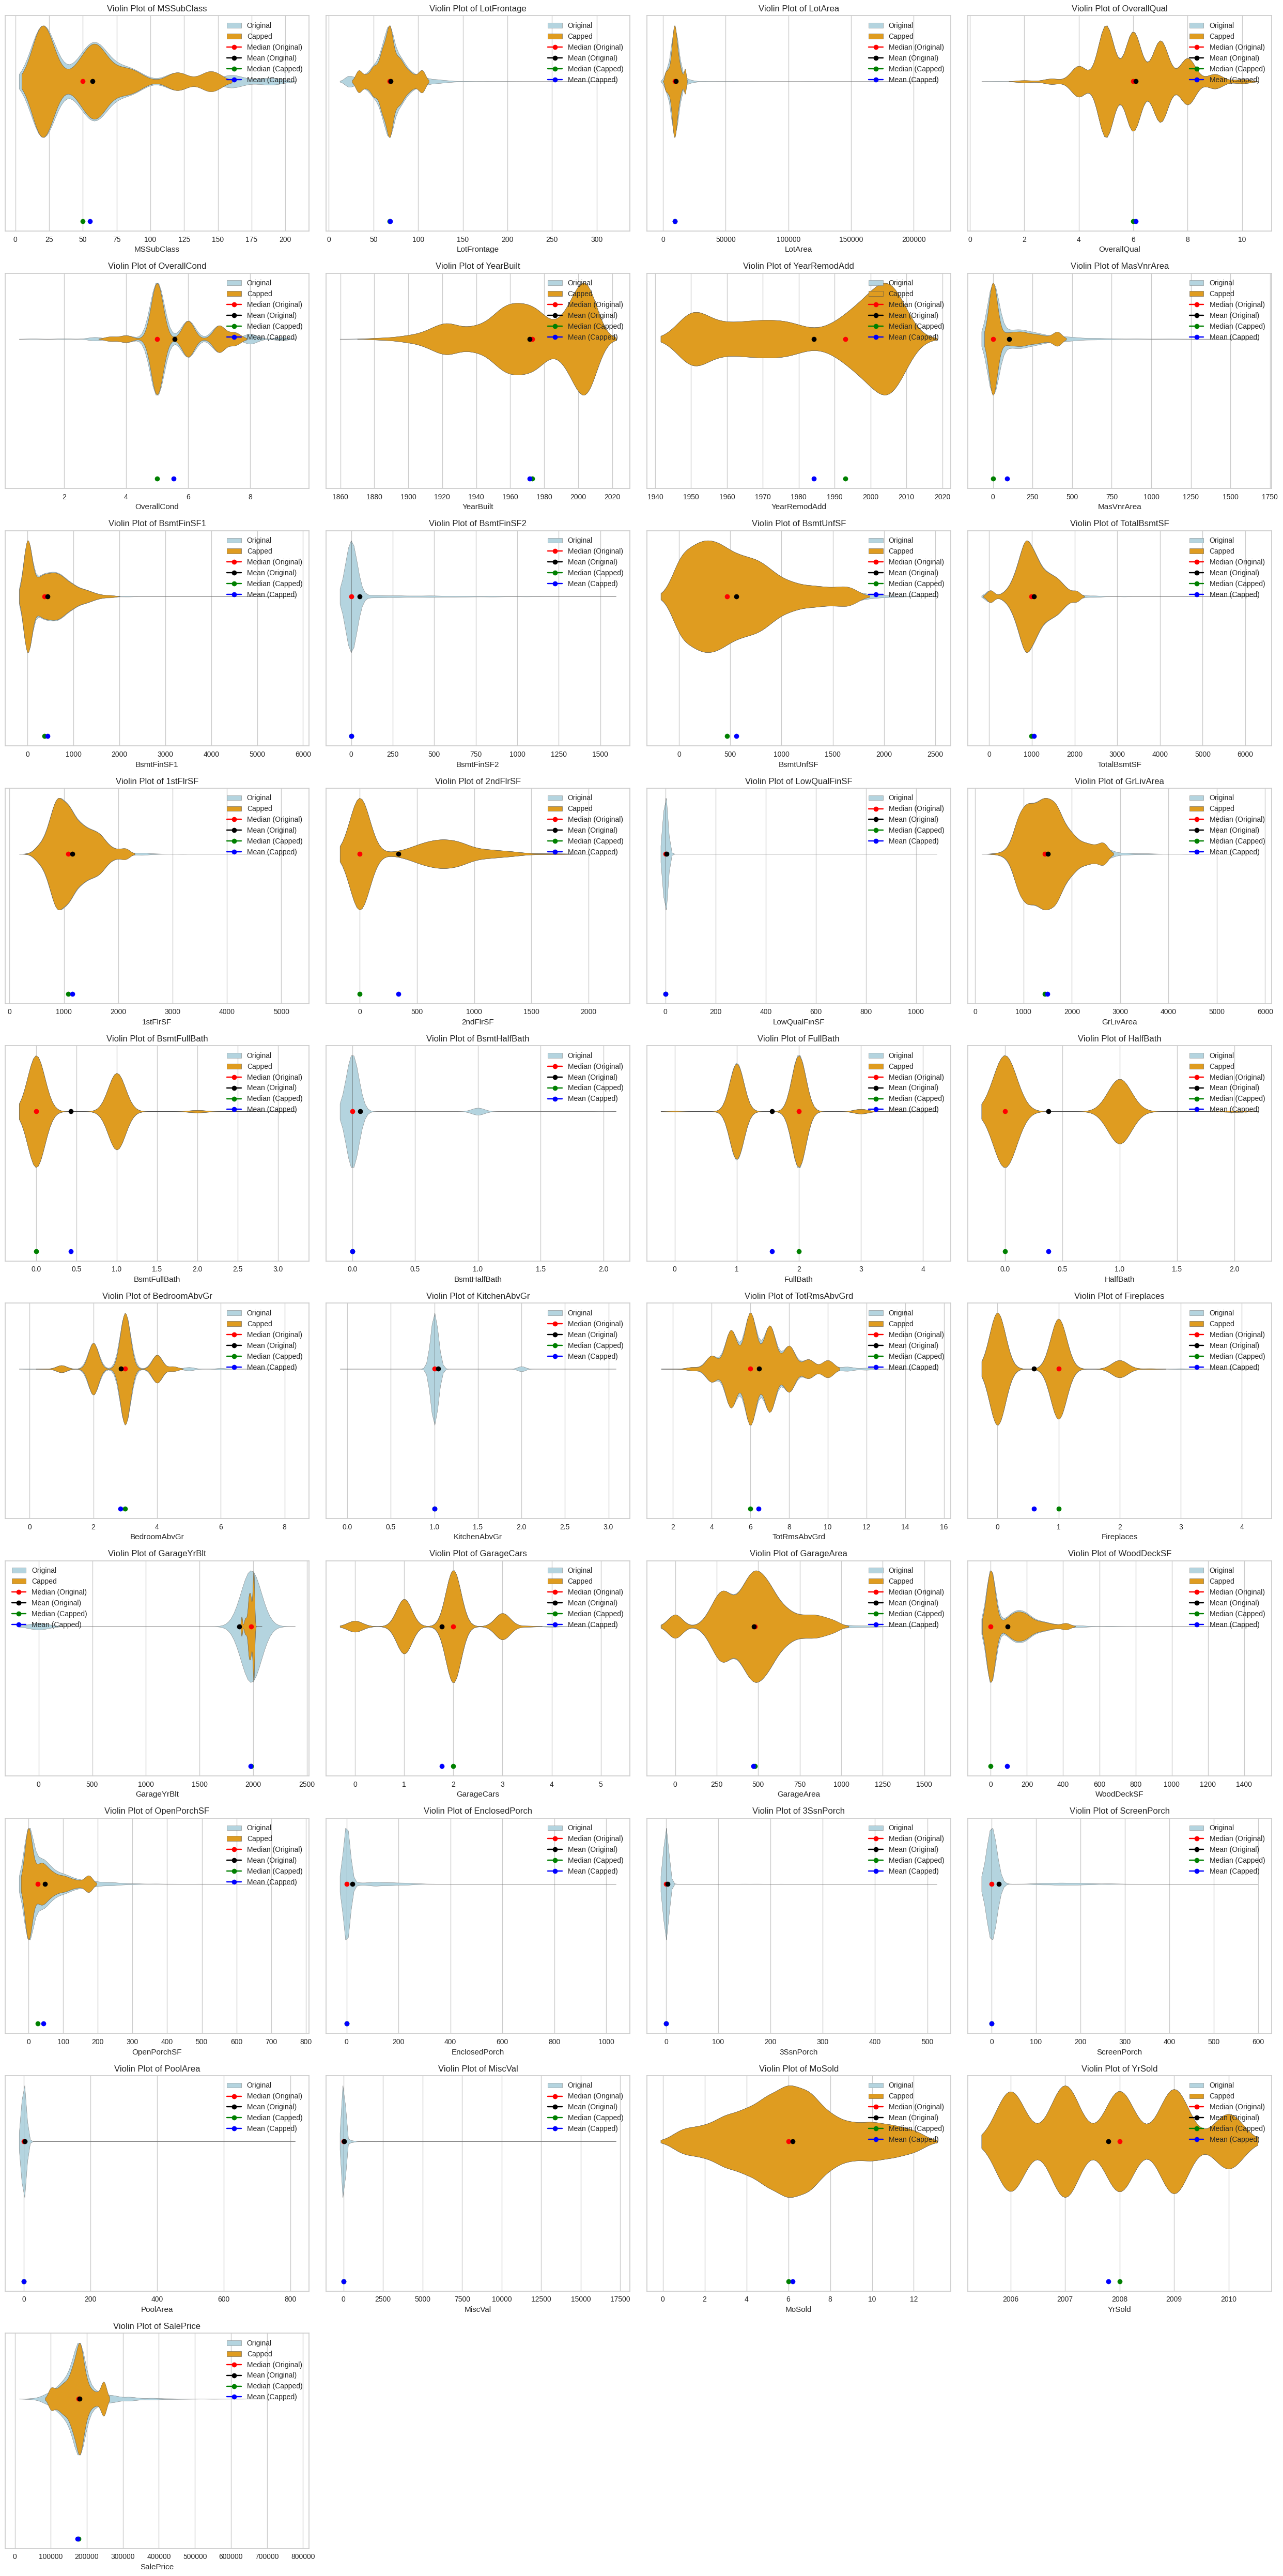

In [226]:
def plot_violin_comparison(original_df,capped_df,columns):
    fig,axes=plt.subplots(nrows=int(np.ceil(len(columns)/4)),ncols=4,figsize=(25,50))
    axes=axes.flatten()
    for i,col in enumerate(columns):
        sns.violinplot(x=original_df[col],ax=axes[i],color='lightblue',label='Original',inner=None)
        sns.violinplot(x=capped_df[col],ax=axes[i],color='orange',label='Capped',inner=None)
        median_original=original_df[col].median()
        mean_original=original_df[col].mean()
        median_capped=capped_df[col].median()
        mean_capped=capped_df[col].mean()
        axes[i].plot(median_original,0,marker='o',color='red',label='Median (Original)')
        axes[i].plot(mean_original,0,marker='o',color='black',label='Mean (Original)')
        axes[i].plot(median_capped,1,marker='o',color='green',label='Median (Capped)')
        axes[i].plot(mean_capped,1,marker='o',color='blue',label='Mean (Capped)')
        axes[i].legend()
        axes[i].set_title(f'Violin Plot of {col}')
    for j in range(i+1,len(axes)):
      fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
plot_violin_comparison(df,df_cap,num_col)

In [324]:
correlation_matrix = df_cap.corr()
threshold = 0.01
high_corr_features = correlation_matrix[abs(correlation_matrix['SalePrice']) > threshold].index.tolist()
new_df = df_cap[high_corr_features]

In [325]:
new_df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3           65     8450       1         3   
1             20         3           80     9600       1         3   
2             60         3           68    11250       1         0   
3             70         3           60     9550       1         0   
4             60         3           84    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
2914         145         4           33     1936       1         3   
2915         145         4           33     1894       1         3   
2916          20         3          105    17708       1         3   
2917          85         3           62    10441       1         3   
2918          60         3           74     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  GarageQual  \
0               3          0          4          0  ...           5   
1               3          0          2          0  ...           5   
2               3          0          4          0  ...           5   
3               3          0          0          0  ...           5   
4               3          0          2          0  ...           5   
...           ...        ...        ...        ...  ...         ...   
2914            3          0          4          0  ...           3   
2915            3          0          4          0  ...           5   
2916            3          0          4          0  ...           5   
2917            3          0          4          0  ...           3   
2918            3          0          4          1  ...           5   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
0              5           2           0           61       2    2008   
1              5           2         298            0       5    2007   
2              5           2           0           42       9    2008   
3              5           2           0           35       2    2006   
4              5           2         192           84      12    2008   
...          ...         ...         ...          ...     ...     ...   
2914           3           2           0            0       6    2006   
2915           5           2           0           24       4    2006   
2916           5           2         420            0       9    2006   
2917           3           2          80           32       7    2006   
2918           5           2         190           48      11    2006   

      SaleType  SaleCondition  SalePrice  
0            8              4  208500.00  
1            8              4  181500.00  
2            8              4  223500.00  
3            8              0  140000.00  
4            8              4  247545.75  
...        ...            ...        ...  
2914         8              4  167081.00  
2915         8              0  164788.00  
2916         8              0  219222.00  
2917         8              4  184924.00  
2918         8              4  187741.00  

[2919 rows x 64 columns]

In [326]:
new_X=new_df.drop('SalePrice',axis=1)
new_X

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3           65     8450       1         3   
1             20         3           80     9600       1         3   
2             60         3           68    11250       1         0   
3             70         3           60     9550       1         0   
4             60         3           84    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
2914         145         4           33     1936       1         3   
2915         145         4           33     1894       1         3   
2916          20         3          105    17708       1         3   
2917          85         3           62    10441       1         3   
2918          60         3           74     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  GarageArea  \
0               3          0          4          0  ...         548   
1               3          0          2          0  ...         460   
2               3          0          4          0  ...         608   
3               3          0          0          0  ...         642   
4               3          0          2          0  ...         836   
...           ...        ...        ...        ...  ...         ...   
2914            3          0          4          0  ...           0   
2915            3          0          4          0  ...         286   
2916            3          0          4          0  ...         576   
2917            3          0          4          0  ...           0   
2918            3          0          4          1  ...         650   

      GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  \
0              5           5           2           0           61       2   
1              5           5           2         298            0       5   
2              5           5           2           0           42       9   
3              5           5           2           0           35       2   
4              5           5           2         192           84      12   
...          ...         ...         ...         ...          ...     ...   
2914           3           3           2           0            0       6   
2915           5           5           2           0           24       4   
2916           5           5           2         420            0       9   
2917           3           3           2          80           32       7   
2918           5           5           2         190           48      11   

      YrSold  SaleType  SaleCondition  
0       2008         8              4  
1       2007         8              4  
2       2008         8              4  
3       2006         8              0  
4       2008         8              4  
...      ...       ...            ...  
2914    2006         8              4  
2915    2006         8              0  
2916    2006         8              0  
2917    2006         8              4  
2918    2006         8              4  

[2919 rows x 63 columns]

In [327]:
new_y=new_df['SalePrice']
new_y

0       208500.00
1       181500.00
2       223500.00
3       140000.00
4       247545.75
          ...    
2914    167081.00
2915    164788.00
2916    219222.00
2917    184924.00
2918    187741.00
Name: SalePrice, Length: 2919, dtype: float64

In [328]:
new_X_=mms.fit_transform(new_X)
new_X

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             60         3           65     8450       1         3   
1             20         3           80     9600       1         3   
2             60         3           68    11250       1         0   
3             70         3           60     9550       1         0   
4             60         3           84    14260       1         0   
...          ...       ...          ...      ...     ...       ...   
2914         145         4           33     1936       1         3   
2915         145         4           33     1894       1         3   
2916          20         3          105    17708       1         3   
2917          85         3           62    10441       1         3   
2918          60         3           74     9627       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  GarageArea  \
0               3          0          4          0  ...         548   
1               3          0          2          0  ...         460   
2               3          0          4          0  ...         608   
3               3          0          0          0  ...         642   
4               3          0          2          0  ...         836   
...           ...        ...        ...        ...  ...         ...   
2914            3          0          4          0  ...           0   
2915            3          0          4          0  ...         286   
2916            3          0          4          0  ...         576   
2917            3          0          4          0  ...           0   
2918            3          0          4          1  ...         650   

      GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  \
0              5           5           2           0           61       2   
1              5           5           2         298            0       5   
2              5           5           2           0           42       9   
3              5           5           2           0           35       2   
4              5           5           2         192           84      12   
...          ...         ...         ...         ...          ...     ...   
2914           3           3           2           0            0       6   
2915           5           5           2           0           24       4   
2916           5           5           2         420            0       9   
2917           3           3           2          80           32       7   
2918           5           5           2         190           48      11   

      YrSold  SaleType  SaleCondition  
0       2008         8              4  
1       2007         8              4  
2       2008         8              4  
3       2006         8              0  
4       2008         8              4  
...      ...       ...            ...  
2914    2006         8              4  
2915    2006         8              0  
2916    2006         8              0  
2917    2006         8              4  
2918    2006         8              4  

[2919 rows x 63 columns]

In [329]:
new_X_train,new_X_test,new_y_train,new_y_test=train_test_split(new_X,new_y,test_size=0.3,random_state=1)

In [330]:
lr=LinearRegression()
lr.fit(new_X_train,new_y_train)

LinearRegression()

In [331]:
new_y_pred=lr.predict(new_X_test)
new_y_pred

array([218653.64488584, 152164.35964205, 201519.7324998 , 161904.4238911 ,
       220111.89053736, 178283.57227618, 125711.90665445, 162522.08138174,
       168413.18151554, 172206.03331688, 207588.44607389, 151517.56656842,
       205512.20219258, 147643.62175517, 208229.11730782, 188324.83614752,
       223261.11654417, 116576.39004111, 208918.48770769, 145839.42579073,
       184878.54265692, 165307.34536385, 132270.9659685 , 125655.28597453,
       184750.5320753 , 161192.12024673, 226175.50529451, 191117.63552147,
       185712.77629234, 182468.22809817, 195337.44738986, 175655.25324089,
       200816.90428038, 171292.41751676, 130964.76240057, 137100.06781921,
       124472.7948832 , 138800.19485789, 209444.89864664, 174531.8840994 ,
       216943.18649156, 156655.42383252, 141865.58736838, 195412.82727817,
       163491.60931226, 187998.94220098, 153270.67644715, 202359.74013219,
       138054.19965794, 158502.18910639, 148477.89697163, 193284.73438904,
       236737.61218605, 2

In [332]:
result=pd.DataFrame({'Actual value':y_test,'Predicted value':new_y_pred})
result.reset_index(drop=True,inplace=True)
result

Actual value  Predicted value
0       247545.75    218653.644886
1       168690.00    152164.359642
2       177199.00    201519.732500
3       149900.00    161904.423891
4       247545.75    220111.890537
..            ...              ...
871      99143.75    148303.201903
872     196053.00    178499.891914
873     172400.00    179674.254106
874     198678.00    200147.718863
875     207500.00    194262.700854

[876 rows x 2 columns]

In [333]:
print('MAE :',mean_absolute_error(y_test,new_y_pred))
print('MSE :',mean_squared_error(y_test,new_y_pred))
print('RSE :',np.sqrt(mean_squared_error(y_test,new_y_pred)))
print('r2_score :',r2_score(y_test,new_y_pred))

MAE : 22170.54087238227
MSE : 712935921.0718807
RSE : 26700.85993131833
r2_score : 0.5011893924403767


# **PyCaret - Model Evaluation**

In [334]:
!pip install pycaret

In [335]:
from pycaret.regression import*
setup(new_df,target='SalePrice')

In [336]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ElasticNet(random_state=7359)

# **Model Initialization**

In [342]:
from sklearn.linear_model import ElasticNet

In [343]:
en=ElasticNet(random_state=7359)
en.fit(new_X_train, new_y_train)

ElasticNet(random_state=7359)

# **Testing the Model Performance**

In [344]:
y_pred=en.predict(new_X_test)
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score :',r2_score(y_test,y_pred))

MAE : 21982.061400049446
MSE : 696645093.5526056
RSE : 26394.035188894584
r2_score : 0.5125873839461511


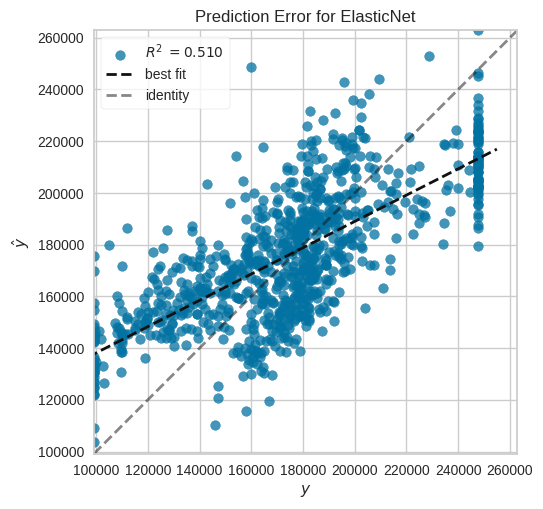

In [345]:
plot_model(en,plot='error')

# **Exporting the Model**

In [347]:
import pickle

In [348]:
pickle.dump(en,open('houseprice_model.sav','wb'))
pickle.dump(mms,open('houseprice_scaler.sav','wb'))